# Compare double logistic curve fitting with quadratic interpolation

These methods allow us to go from bi-weekly data to daily, but they appraoch the problem differently.

Double logistics code example is taken from: https://stackoverflow.com/questions/77639914/ndvi-double-logistic-curve-fitting-in-python


In [4]:
%matplotlib inline

import sys
import pickle
import warnings
import numpy as np
import xarray as xr
from scipy import stats
import geopandas as gpd
import matplotlib.pyplot as plt

## Analysis Parameters


In [5]:
timeseries_file = '/g/data/os22/chad_tmp/Aus_phenology/data/ecoregions_NDVI_timeseries.pkl'
ecoregions_file = '/g/data/os22/chad_tmp/Aus_phenology/data/Ecoregions2017_aus_processed.geojson'

## Open data

In [6]:
with open(timeseries_file, 'rb') as f:
    results = pickle.load(f)

gdf = gpd.read_file(ecoregions_file)

## Test double logistic curve fitting on seasonal cycle

<!-- import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def double_logistic_function(t, wNDVI, mNDVI, S, A, mS, mA):
    sigmoid1 = 1 / (1 + np.exp(-mS * (t - S)))
    sigmoid2 = 1 / (1 + np.exp(mA * (t - A)))
    seasonal_term = sigmoid1 + sigmoid2 - 1
    return wNDVI + (mNDVI - wNDVI) * seasonal_term

def weight_function(t, S, A, r):
    tr = 100 * (t - S) / (A - S)
    tr = np.clip(tr, 0, 100)
    return np.exp(-np.abs(r) / (1 + tr / 10))

def fit_curve(t, ndvi_observed):
    initial_guess = [np.min(ndvi_observed), np.max(ndvi_observed), np.mean(t), np.mean(t), 1, 1]
    params, _ = curve_fit(double_logistic_function, t, ndvi_observed, p0=initial_guess, maxfev=10000)
    residuals = ndvi_observed - double_logistic_function(t, *params)
    weights = weight_function(t, params[2], params[3], residuals)
    params, _ = curve_fit(double_logistic_function, t, ndvi_observed, p0=initial_guess, sigma=weights, maxfev=10000)
    return params

doys = ndvi_cycle.time.dt.dayofyear.values[2:]
doys_frac = doys/365
values = ndvi_cycle.values[2:]

##Fit the curve
parameters = fit_curve(doys_frac, values)

##Plot the observed NDVI values
plt.scatter(doys, values, label='Observed NDVI')

##Generate points for the fitted curve
t_fit = np.linspace(min(doys_frac), max(doys_frac), 365)
ndvi_fit = double_logistic_function(t_fit, *parameters)

##Plot the fitted curve
plt.plot(t_fit*365, ndvi_fit, label='Fitted Curve', color='red')

plt.xlabel('Day of the Year')
plt.ylabel('NDVI')
plt.legend()
plt.title('Double Logistic Curve Fitting for NDVI Observations')
plt.show() -->


<!-- def xr_count_peaks(ds, order=16):
    def _find_peaks(ds):
        peaks = scipy.signal.argrelextrema(ds, np.greater, order=order)
        # peaks = scipy.signal.find_peaks(ds, height=0.2, distance=order)
        return len(peaks[0])
    
    ds_n_peaks = xr.apply_ufunc(_find_peaks,
                              ds, 
                              input_core_dims=[['time']],
                              vectorize=True, 
                              dask='parallelized',
                              output_dtypes=[np.float32]
                             )

    return ds_n_peaks.rename('n_peaks')

%%time
n_peaks = xr_count_peaks(ds_smooth.sel(time=slice('2004-09', '2006-03'))) -->

In [7]:
from scipy.optimize import curve_fit

def double_logistic_function(t, wNDVI, mNDVI, S, A, mS, mA):
    sigmoid1 = 1 / (1 + np.exp(-mS * (t - S)))
    sigmoid2 = 1 / (1 + np.exp(mA * (t - A)))
    seasonal_term = sigmoid1 + sigmoid2 - 1
    return wNDVI + (mNDVI - wNDVI) * seasonal_term

def weight_function(t, S, A, r):
    tr = 100 * (t - S) / (A - S)
    tr = np.clip(tr, 0, 100)
    return np.exp(-np.abs(r) / (1 + tr / 10))

def fit_curve(t, ndvi_observed):
    initial_guess = [np.min(ndvi_observed), np.max(ndvi_observed), np.mean(t), np.mean(t), 1, 1]
    params, _ = curve_fit(double_logistic_function, t, ndvi_observed, p0=initial_guess, maxfev=10000)
    residuals = ndvi_observed - double_logistic_function(t, *params)
    weights = weight_function(t, params[2], params[3], residuals)
    params, _ = curve_fit(double_logistic_function, t, ndvi_observed, p0=initial_guess, sigma=weights, maxfev=10000)
    return params

### Extract a time series to test with

In [9]:
l = list(results.keys())
l.sort()
l

['Arnhem Land tropical savanna',
 'Australian Alps montane grasslands',
 'Brigalow tropical savanna',
 'Cape York Peninsula tropical savanna',
 'Carnarvon xeric shrublands',
 'Carpentaria tropical savanna',
 'Central Ranges xeric scrub',
 'Coolgardie woodlands',
 'Eastern Australia mulga shrublands',
 'Eastern Australian cool temperate forests',
 'Eastern Australian warm temperate forests',
 'Einasleigh upland savanna',
 'Esperance mallee',
 'Eyre and York mallee',
 'Flinders-Lofty montane woodlands',
 'Gibson desert',
 'Great Sandy-Tanami desert',
 'Great Victoria desert',
 'Hampton mallee and woodlands',
 'Irrigated cropping NSW',
 'Irrigated cropping QLD',
 'Irrigated cropping SA',
 'Irrigated cropping VIC',
 'Irrigated cropping WA',
 'Jarrah-Karri forest and shrublands',
 'Kimberly tropical savanna',
 'Mitchell Grass Downs',
 'Murray-Darling woodlands and mallee',
 'Naracoorte woodlands',
 'Nullarbor Plains xeric shrublands',
 'Pilbara shrublands',
 'Queensland tropical rain forest

In [52]:
k = 'Jarrah-Karri forest and shrublands'
ndvi_cycle = results[k].sel(time='2002').resample(time='1M').mean()

## Fit curves

In [75]:
doys = ndvi_cycle.time.dt.dayofyear.values#[2:]
doys_frac = doys/365
values = ndvi_cycle.values#[2:]

##Fit the curve
parameters = fit_curve(doys_frac, values)

##Generate points for the fitted curve
t_fit = np.linspace(min(doys_frac), max(doys_frac), 365)
ndvi_fit = double_logistic_function(t_fit, *parameters)

#compare with quadratic
quad = ndvi_cycle.dropna(dim='time', how='all').resample(time='1D').interpolate(kind='cubic')



## Plot

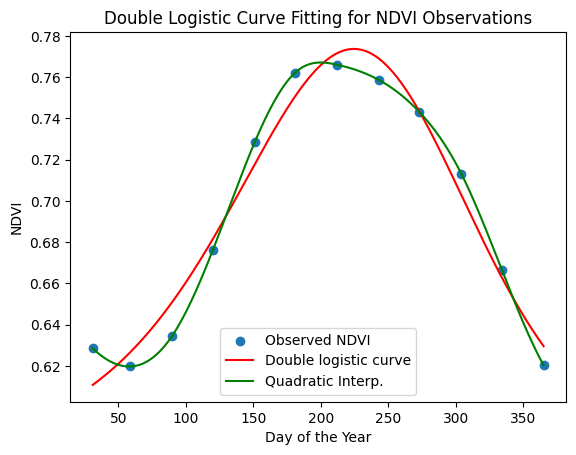

In [76]:
plt.scatter(doys, values, label='Observed NDVI')
plt.plot(t_fit*365, ndvi_fit, label='Double logistic curve', color='red')
plt.plot(quad.time.dt.dayofyear, quad.values, label='Quadratic Interp.', color='green')
plt.xlabel('Day of the Year')
plt.ylabel('NDVI')
plt.legend()
plt.title('Double Logistic Curve Fitting for NDVI Observations')
plt.show()

In [62]:
results[k].time.dt.timestamp

AttributeError: 'DatetimeAccessor' object has no attribute 'timestamp'

In [70]:
t = pd.Timestamp(results[k].time[0].values).timestamp()

In [71]:
import datetime

In [74]:
datetime.datetime(results[k].time[0].values)

TypeError: 'numpy.datetime64' object cannot be interpreted as an integer